### Linear Combination of Inputs
$$
Z(x) = W^T \cdot X + B
$$
- **Description**: This represents the linear combination of input features $ X$  with the weight vector  $W$  and bias term  $B$ . Here,  $W^T$  is the transpose of the weight vector, making $ Z(x) $ a scalar.

### Sigmoid Function
$$
\sigma(Z) = \frac{1}{1 + e^{-Z}}
$$
- **Description**: The sigmoid function, denoted as $ \sigma(Z) $, maps any real-valued number into the (0, 1) interval. This function is used to model the probability that a given input belongs to a certain class.

### Logistic Regression Model
$$
P(Y=1|X) = \sigma(Z(x)) = \frac{1}{1 + e^{-(W^T \cdot X + B)}}
$$
- **Description**: This equation gives the probability that the dependent variable $ Y $ equals 1 given the input features $ X $. It applies the sigmoid function to the linear combination of inputs.

### Loss Function (Log-Loss or Binary Cross-Entropy)
$$
L(y,\hat{y})  = -[y \log(\hat{y}) + (1 - y) \log(1 - \hat{y})]
$$
- **Description**: The loss function measures the discrepancy between the true label  $y$  and the predicted probability  $\hat{y}$ . It is minimized during the training process to improve the model's accuracy.

### Cost Function (Log-Loss or Binary Cross-Entropy)
$$
J(W, B)=-\frac{1}{m}\sum_{i=1}^{m}[y \log(\hat{y}) + (1 - y) \log(1 - \hat{y})]
$$
- **Description**: The cost function measures the discrepancy between the true label $ y $ and the predicted probability $ \hat{y} $. It is used to evaluate the performance of the logistic regression model, with the goal of minimizing this value during training.

### Gradient Descent Update Rule for Weights
$$
W \leftarrow W - \alpha \frac{\partial L}{\partial W}
$$
- **Description**: This update rule adjusts the weights $ W $ to minimize the loss function $ L $. Here, $ \alpha$  is the learning rate, and $ \frac{\partial L}{\partial W} $ is the gradient of the loss function with respect to the weights.

### Gradient Descent Update Rule for Bias
$$
B \leftarrow B - \alpha \frac{\partial L}{\partial B}
$$
- **Description**: Similar to the weight update rule, this adjusts the bias term $ B $ to minimize the loss function.

### Gradient of the Loss with Respect to Weights
$$
\frac{\partial L}{\partial W} = \frac{1}{m} \sum_{i=1}^{m} ( \hat{y}^{(i)} - y^{(i)} ) X^{(i)}
$$
- **Description**: This gradient calculation involves the average over all training examples $ m $. It measures how much the loss would change with a small change in the weights $ W $.

### Gradient of the Loss with Respect to Bias
$$
\frac{\partial L}{\partial B} = \frac{1}{m} \sum_{i=1}^{m} ( \hat{y}^{(i)} - y^{(i)} )
$$
- **Description**: This gradient calculation involves the average over all training examples $ m $. It measures how much the loss would change with a small change in the bias term $ B $.

In [34]:
!unzip /content/Classification.zip

Archive:  /content/Classification.zip
replace Heart Attack.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


## Step 1: Import Necessary Libraries


In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
data = pd.read_csv('/content/Heart Attack.csv')
# data['class'] = data['class'].apply(lambda x: 0 if x == 'negative' else 1)

data['class'] = data['class'].replace({'negative': 0, 'positive': 1})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 92.9 KB


## Step 2: Load and Preprocess the Data

In [37]:
# Separate features and target variable
X = data.iloc[:, :-1].values  # All columns except the last one
y = data.iloc[:, -1].values  # The last column

# Normalize features
X = (X - X.mean(axis=0)) / X.std(axis=0)

## Step 3: Implement Sigmoid Function

In [38]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

## Step 4: Initialize Parameters

In [39]:
def initialize_parameters(n_features):
    W = np.zeros(n_features)
    B = 0
    return W, B

n_features = X.shape[1]
W, B = initialize_parameters(n_features)

## Step 5: Define the Cost Function

In [40]:
def compute_cost(X, y, W, B):
    m = len(y)
    Z = np.dot(X, W) + B
    A = sigmoid(Z)
    cost = - (1 / m) * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
    return cost

## Step 6: Implement Gradient Descent

In [41]:
def gradient_descent(X, y, W, B, learning_rate, epochs):
    m = len(y)
    cost_history = []

    for i in range(epochs):
        Z = np.dot(X, W) + B
        A = sigmoid(Z)

        # Compute gradients
        dW = (1 / m) * np.dot(X.T, (A - y))
        dB = (1 / m) * np.sum(A - y)

        # Update parameters
        W -= learning_rate * dW
        B -= learning_rate * dB

        # Compute and store the cost
        cost = compute_cost(X, y, W, B)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f'Epoch {i}: Cost {cost}')

    return W, B, cost_history

## Step 7: Train the Model

In [42]:
learning_rate = 0.01
epochs = 1000

W, B, cost_history = gradient_descent(X, y, W, B, learning_rate, epochs)

Epoch 0: Cost 0.6926212237533955
Epoch 100: Cost 0.651536816477973
Epoch 200: Cost 0.6260139804506825
Epoch 300: Cost 0.6090498552962774
Epoch 400: Cost 0.597038298068152
Epoch 500: Cost 0.5880721840427087
Epoch 600: Cost 0.5810801863072251
Epoch 700: Cost 0.5754258794983401
Epoch 800: Cost 0.5707131405744061
Epoch 900: Cost 0.5666856307854389


## Step 8: Plot the Cost Function

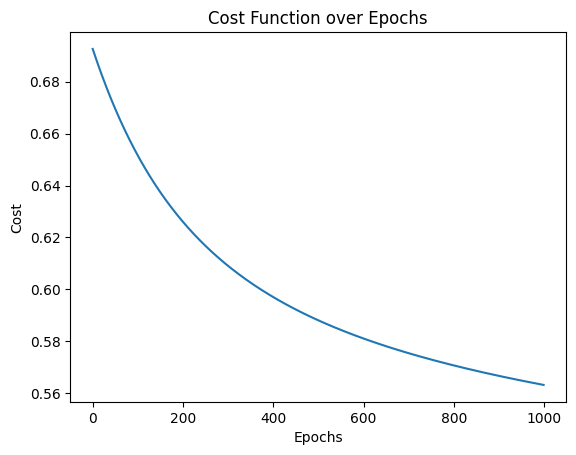

In [43]:
plt.plot(cost_history)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Function over Epochs')
plt.show()

## Step 9: Make Predictions

In [44]:
def predict(X, W, B, threshold=0.5):
    Z = np.dot(X, W) + B
    A = sigmoid(Z)
    return A >= threshold

# Predict on training data
predictions = predict(X, W, B)

## Step 10: Evaluate the Model

In [45]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Calculate accuracy
train_accuracy = accuracy(y, predictions)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

Training Accuracy: 71.72%


## Several ways to improve the accuracy of your logistic regression model

1. **Feature Engineering**:
    - **Add Interaction Terms**: Include combinations of features to capture relationships between them.
    - **Polynomial Features**: Add polynomial terms (e.g., \(x^2\), \(x^3\)) to capture non-linear relationships.
    - **Feature Scaling**: Ensure all features are on a similar scale, typically done via normalization or standardization.

2. **Regularization**:
    - Apply regularization techniques such as L1 (Lasso) or L2 (Ridge) to prevent overfitting and improve generalization.

3. **Data Augmentation**:
    - Increase the size of your dataset by adding more examples or using techniques like synthetic data generation.

4. **Feature Selection**:
    - Remove irrelevant or redundant features to reduce noise and improve model performance.

5. **Hyperparameter Tuning**:
    - Adjust hyperparameters such as the learning rate and number of epochs to find the optimal values for your model.

6. **Cross-Validation**:
    - Use cross-validation to get a better estimate of your model's performance and to ensure it generalizes well to unseen data.

7. **Class Imbalance Handling**:
    - If your dataset has imbalanced classes, use techniques such as oversampling the minority class, undersampling the majority class, or using appropriate evaluation metrics like the F1 score.

8. **Model Ensemble**:
    - Combine predictions from multiple models to improve overall performance (e.g., bagging, boosting).

Below are some code snippets to implement a few of these techniques.

### Adding Polynomial Features
```python
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
```

### Regularization
Update the cost function to include a regularization term:
```python
def compute_cost_with_regularization(X, y, W, B, lambda_):
    m = len(y)
    Z = np.dot(X, W) + B
    A = sigmoid(Z)
    cost = - (1 / m) * np.sum(y * np.log(A) + (1 - y) * log(1 - A))
    reg_cost = cost + (lambda_ / (2 * m)) * np.sum(np.square(W))
    return reg_cost
```
Update the gradient descent function to include regularization:
```python
def gradient_descent_with_regularization(X, y, W, B, learning_rate, epochs, lambda_):
    m = len(y)
    cost_history = []

    for i in range(epochs):
        Z = np.dot(X, W) + B
        A = sigmoid(Z)

        # Compute gradients with regularization
        dW = (1 / m) * np.dot(X.T, (A - y)) + (lambda_ / m) * W
        dB = (1 / m) * np.sum(A - y)

        # Update parameters
        W -= learning_rate * dW
        B -= learning_rate * dB

        # Compute and store the cost
        cost = compute_cost_with_regularization(X, y, W, B, lambda_)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f'Epoch {i}: Cost {cost}')

    return W, B, cost_history
```

### Cross-Validation
```python
from sklearn.model_selection import cross_val_score

def cross_validation_accuracy(X, y, W, B, cv=5):
    accuracies = cross_val_score(LogisticRegression(), X, y, cv=cv, scoring='accuracy')
    return np.mean(accuracies)

cv_accuracy = cross_validation_accuracy(X, y, W, B)
print(f'Cross-Validation Accuracy: {cv_accuracy * 100:.2f}%')
```

### Using Scikit-Learn for Better Optimization and Feature Selection
```python
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# Evaluate the model
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
```

### Handling Class Imbalance
```python
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
```
